In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import math
import random

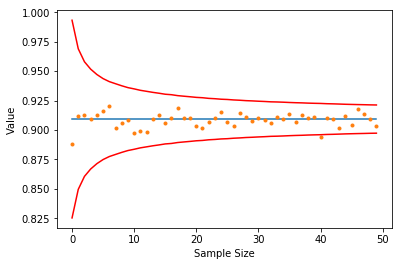

In [2]:
#Code to estimate the value of the cos integral
random.seed(0)

mcos_estimates = [None]*50
mcos_std = [None]*50

for i in range(1,51): # part b)
    unif_array = uniform.rvs(size = 1000*i)*2
    mcos_val = np.cos(unif_array)*2 # part a)
    mcos_estimates[i-1] = np.mean(mcos_val) # part a)
    mcos_std[i-1] = np.std(mcos_val)/np.sqrt(1000*i)
    
#For the analytic solution
mcos_analytic = np.sin(2) - np.sin(0)

#Plotting the graphs # part c)
plt.plot([mcos_analytic]*50)
plt.plot(mcos_estimates,'.')
plt.plot(mcos_analytic+np.array(mcos_std)*3, 'r')
plt.plot(mcos_analytic-np.array(mcos_std)*3, 'r')
plt.xlabel("Sample Size")
plt.ylabel("Value")
plt.show()

Text(0,0.5,'Value')

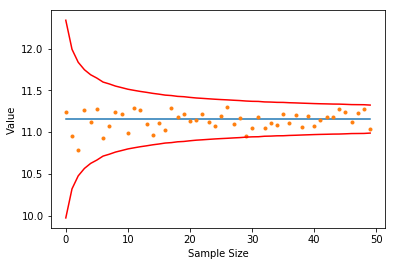

In [5]:
#Code for the put option
random.seed(0)

#Share information
sigma = 0.3
r = 0.1
S0 = 100

#Option information
T = 0.5
K = 110

#Function for terminal share valuation
def terminal_shareprice(S_0, risk_free_rate,sigma,Z,T):
    """Generates the terminal share price given some random normal values, Z"""
    return S_0*np.exp((risk_free_rate-sigma**2/2)*T+sigma*np.sqrt(T)*Z)

#Function for put valuations
def put_price(S_0,K,risk_free_rate,sigma,Z,T):
    """Function for evaluating the call price in Monte Carlo Estimation"""
    share_terminal = terminal_shareprice(S_0, risk_free_rate, sigma, Z, T)
    return np.exp(-risk_free_rate*T)*np.maximum(K-share_terminal,0)

#Empty vectors to be filled later
mput_estimates = [None]*50
mput_std = [None]*50

#Applying MC estimation
for i in range(1,51):
    norm_array = norm.rvs(size = 1000*i)
    mput_val = put_price(S0,K,r,sigma,norm_array,T)
    mput_estimates[i-1] = np.mean(mput_val)
    mput_std[i-1] = np.std(mput_val)/np.sqrt(1000*i)
    
#Determining the analytical solution
d_1 = (math.log(S0/K)+(r + sigma**2/2)*T)/(sigma*math.sqrt(T))
d_2 = d_1 - sigma*math.sqrt(T)
mput_analytic = K*math.exp(-r*T)*norm.cdf(-d_2)-S0*norm.cdf(-d_1)

#Plotting the graph
plt.plot([mput_analytic]*50)
plt.plot(mput_estimates,'.')
plt.plot(mput_analytic+np.array(mput_std)*3, 'r')
plt.plot(mput_analytic-np.array(mput_std)*3, 'r')
plt.xlabel("Sample Size")
plt.ylabel("Value")

